In [1]:
import os
import sys

import psycopg2
from textwrap import dedent

import pandas as pd
import geopandas as gpd
import numpy as np

import plotly
import plotly.express as px
import plotly.graph_objects as go

import dash
import dash_core_components as dcc
import dash_html_components as html

from utils import connect_and_query

In [2]:
conn = psycopg2.connect(os.environ.get('DATABASE_URL'))
assert conn is not None, 'need to fix conn!!'

In [3]:
query_select_specific_date = """
                             SELECT
                                direction AS "Direction",
                                station_code AS "Station",
                                CAST(nb_stop_num AS integer) AS "Stop Number",
                                arrival_or_departure AS "Arrival or Departure",
                                CAST(timedelta_from_sched AS integer) AS "Delay"
                             FROM
                                 stops_joined
                             WHERE
                                 origin_date = '2021-06-10' AND
                                 train_num = '94'
                             ORDER BY nb_stop_num DESC;
                             """

In [4]:
query_date_df = connect_and_query(query_select_specific_date)

In [5]:
query_date_df

,Direction,Station,Stop Number,Arrival or Departure,Delay
0,Northbound,BOS,24,Arrival,-5
1,Northbound,BBY,23,Departure,-2
2,Northbound,RTE,22,Departure,0
3,Northbound,PVD,21,Departure,12
4,Northbound,KIN,20,Departure,10
5,Northbound,NLC,17,Departure,12
6,Northbound,OSB,16,Departure,10
7,Northbound,NHV,15,Arrival,16
8,Northbound,NHV,15,Departure,9
9,Northbound,BRP,14,Departure,22


In [6]:
query_historical = """
                     SELECT
                        station_code AS "Station",
                        CAST(nb_stop_num AS integer) AS "Stop Number",
                        arrival_or_departure AS "Arrival or Departure",
                        AVG(timedelta_from_sched) AS "Average Delay",
                        STDDEV_POP(timedelta_from_sched) AS "Delay StDev"
                     FROM
                         stops_joined
                     WHERE
                         train_num = '94' AND
                         origin_year BETWEEN 2011 AND 2021
                     GROUP BY station_code, nb_stop_num, arrival_or_departure
                     ORDER BY nb_stop_num ASC;
                    """

In [7]:
historical_df = connect_and_query(query_historical)

In [8]:
historical_df

,Station,Stop Number,Arrival or Departure,Average Delay,Delay StDev
0,WAS,0,Departure,11.506977,22.895456
1,NCR,1,Departure,13.364752,23.782772
2,BWI,2,Departure,14.534476,25.004091
3,BAL,3,Departure,15.318795,25.800074
4,WIL,5,Departure,16.412246,27.307354
5,PHL,6,Arrival,13.984718,27.116957
6,PHL,6,Departure,17.158699,28.186061
7,TRE,7,Departure,19.390187,29.690951
8,MET,8,Departure,28.500000,19.665960
9,EWR,9,Departure,22.407974,32.055320


In [9]:
query_historical20_21 = """
                     SELECT
                        station_code AS "Station",
                        CAST(nb_stop_num AS integer) AS "Stop Number",
                        arrival_or_departure AS "Arrival or Departure",
                        AVG(timedelta_from_sched) AS "Average Delay",
                        STDDEV_POP(timedelta_from_sched) AS "Delay StDev"
                     FROM
                         stops_joined
                     WHERE
                         train_num = '94' AND
                         origin_year BETWEEN 2020 AND 2021
                     GROUP BY station_code, nb_stop_num, arrival_or_departure
                     ORDER BY nb_stop_num ASC;
                    """

In [10]:
historical_df20_21 = connect_and_query(query_historical20_21)

In [11]:
historical_df20_21

,Station,Stop Number,Arrival or Departure,Average Delay,Delay StDev
0,WAS,0,Departure,5.102273,15.257852
1,NCR,1,Departure,6.389831,15.542016
2,BWI,2,Departure,6.514205,17.459363
3,BAL,3,Departure,7.838983,17.673900
4,WIL,5,Departure,8.754237,17.908400
5,PHL,6,Arrival,8.617978,19.787214
6,PHL,6,Departure,7.853107,18.935839
7,TRE,7,Departure,8.711864,20.124093
8,EWR,9,Departure,9.424501,23.091528
9,NWK,10,Departure,9.419540,21.242493


In [12]:
xticks = historical_df["Station"].loc[(historical_df["Arrival or Departure"] == "Departure") | (historical_df["Stop Number"] == 24)]

In [13]:
ymax = np.max(historical_df["Average Delay"])
ymin = np.min(historical_df["Average Delay"])
diff = ymax - ymin

In [14]:
diff

19.836964205385257

In [15]:
ymin

10.263157894736842

In [16]:
ymax

30.1001221001221

In [17]:
yticks = [i for i in range(10,33,3)]

In [18]:
yticks

[10, 13, 16, 19, 22, 25, 28, 31]

In [19]:

means = historical_df["Average Delay"].loc[(historical_df["Arrival or Departure"] == "Departure") | (historical_df["Stop Number"] == 24)]
stdev = historical_df["Delay StDev"].loc[(historical_df["Arrival or Departure"] == "Departure") | (historical_df["Stop Number"] == 24)]

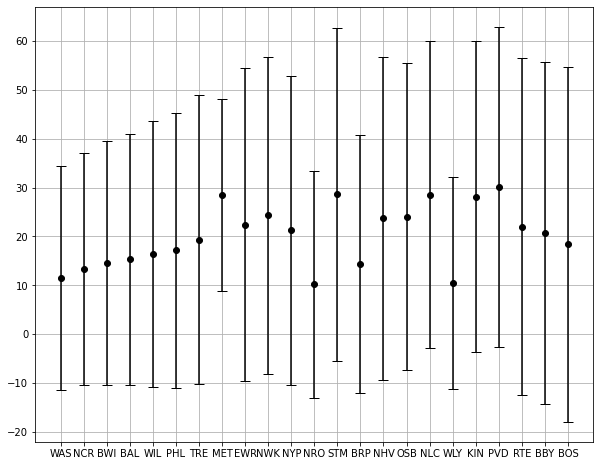

In [120]:
fig = go.Figure()
fig.add_trace